In [1]:
무게     bumpy(1= bumpy, 0 = smooth)    카테고리(1 = 오렌지, 0= 사과)
140        1                             1
170        1                             1
140        0                             0
130        0                             0



SyntaxError: invalid syntax (<ipython-input-1-942b335d7f43>, line 1)

In [3]:
from sklearn import tree
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
labels = [0, 0, 1, 1]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)


In [10]:
print(clf.predict([[130,1]]))

[0]


In [18]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
test_idx = [0, 50, 100]

#training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis = 0)

#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
clf.predict(test_data)

array([0, 1, 2])

<function matplotlib.pyplot.show(*args, **kw)>

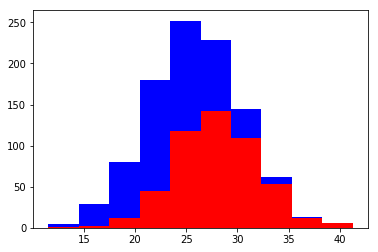

In [30]:
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked= True, color = ['r', 'b'])
plt.show


# 파이프라인 작성

In [124]:
from sklearn import datasets
iris = datasets.load_iris()  

X = iris.data
y = iris.target

In [125]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



In [126]:
from sklearn import tree
from sklearn.metrics import accuracy_score
my_classifier = tree.DecisionTreeClassifier()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))

[2 0 1 2 0 2 1 2 2 2 1 2 2 0 0 0 2 2 1 2 0 1 2 2 1 1 1 1 2 2 0 1 2 0 1 1 1
 0 1 0 1 1 0 2 0 1 1 0 1 1 1 2 1 1 1 0 0 1 1 2 2 0 2 1 0 0 2 2 0 2 2 0 2 0
 1]
0.9466666666666667


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
my_classfier = KNeighborsClassifier()
my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))

[2 0 1 2 0 2 1 2 2 2 1 2 2 0 0 0 2 2 1 2 0 1 2 2 1 1 1 1 2 2 0 1 2 0 1 1 1
 0 1 0 1 1 0 2 0 1 1 0 1 1 1 2 1 1 1 0 0 1 1 2 2 0 2 1 0 0 2 2 0 2 2 0 2 0
 1]
0.9466666666666667


# 분류기 직접 작성

In [123]:
import random 
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(self,y_train)
            predictions.append(label)
        return predictions
    
    def closest(self,row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
            
            return self.y_train[best_index]
    
from sklearn import datasets
iris = datasets.load_iris()  

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

from sklearn.metrics import accuracy_score
my_classfier = ScrappyKNN()
my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))

[2 2 0 2 1 2 1 0 1 1 1 2 1 0 1 1 0 2 1 2 2 2 2 2 1 1 2 0 2 0 2 0 1 1 1 1 1
 0 2 1 0 1 1 0 0 0 2 0 1 2 1 1 1 0 2 2 1 2 0 2 2 1 2 1 1 0 0 2 1 0 0 1 2 1
 0]
0.9733333333333334
